In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image
import numpy as np
import torch
import h5py
import os
from PIL import Image
from tqdm import tqdm

t2np = lambda t: t.detach().cpu().numpy()

/home/jingyuan/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [29]:
input_path = 'resized'
count = 0
error_count = 0
count = 0
print('start loading')
for filename in tqdm(os.listdir(input_path)):
    
    

    f = os.path.join(input_path, filename)
    
    # if os.path.isfile(f):
    #     print(f)
    image = cv2.imread(f)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = torch.from_numpy(image).share_memory_().view(-1,128,128,3)

    if(count == 0):
        dataset = image
    else:
        dataset = torch.cat((dataset, image))


    if count == 3000:
        torch.save(dataset, f'dataset_{int(count/3000)}.pt')
        print(dataset.shape)
        print('save one dataset')
        count = 0
    
    count += 1

start loading


  1%|▍                                  | 3005/243434 [00:54<3:18:25, 20.19it/s]

torch.Size([3001, 128, 128, 3])
save one dataset


  1%|▍                                  | 3191/243434 [01:01<1:17:30, 51.66it/s]


KeyboardInterrupt: 

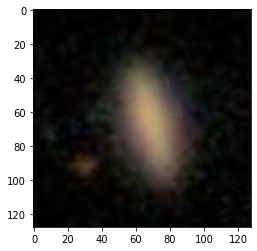

In [30]:
plt.imshow(t2np(dataset[5]))
plt.show()

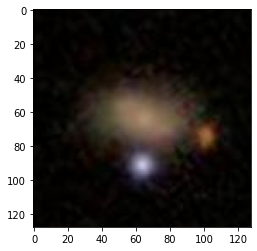

In [32]:
plt.imshow(t2np(dataset[100]))
plt.show()

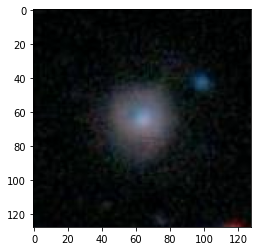

In [18]:
plt.imshow(t2np(image[0]))
plt.show()

In [2]:
dataset = torch.load('dataset_final.pt').share_memory_()
print(dataset.shape)


torch.Size([51017, 128, 128, 3])


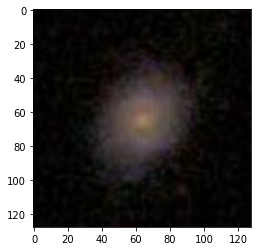

In [3]:
plt.imshow(t2np(dataset[0]))
plt.show()